In [1]:
import numpy as np
import pandas as pd
dataset=pd.read_csv("data/spam_ham_dataset.csv", usecols=["label","text","label_num"])
df = dataset.copy()

df.head()

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      5171 non-null   object
 1   text       5171 non-null   object
 2   label_num  5171 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 121.3+ KB


In [3]:
df.dtypes

label        object
text         object
label_num     int64
dtype: object

In [4]:
print("shape  :",df.shape)
print("columns: ", df.columns)

shape  : (5171, 3)
columns:  Index(['label', 'text', 'label_num'], dtype='object')


In [5]:
df.nunique()

label           2
text         4993
label_num       2
dtype: int64

In [6]:
df.label.unique()

array(['ham', 'spam'], dtype=object)

In [7]:
df["label"].value_counts()

ham     3672
spam    1499
Name: label, dtype: int64

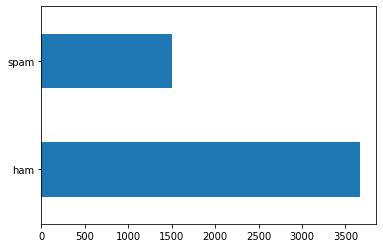

In [8]:
df.label.value_counts().plot.barh();

In [9]:
import nltk
import re
import string
nltk.download('stopwords')
from nltk.corpus import stopwords

def preprocessing_text(text):
    #remove punctuation
    text = [char for char in text if char not in string.punctuation]
    text = ''.join(text)

    #remove stopwords
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]


    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Abdülaziz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
df_f = df
df_f["text"].apply(preprocessing_text)

0       [Subject, enron, methanol, meter, 988291, foll...
1       [Subject, hpl, nom, january, 9, 2001, see, att...
2       [Subject, neon, retreat, ho, ho, ho, around, w...
3       [Subject, photoshop, windows, office, cheap, m...
4       [Subject, indian, springs, deal, book, teco, p...
                              ...                        
5166    [Subject, put, 10, ft, transport, volumes, dec...
5167    [Subject, 3, 4, 2000, following, noms, hpl, ta...
5168    [Subject, calpine, daily, gas, nomination, jul...
5169    [Subject, industrial, worksheets, august, 2000...
5170    [Subject, important, online, banking, alert, d...
Name: text, Length: 5171, dtype: object

In [11]:
#convert the data from categorical to numerical values
from sklearn.feature_extraction.text import CountVectorizer
cove = CountVectorizer(analyzer=preprocessing_text)
covec = cove.fit_transform(df_f["text"])

In [12]:
#to compare the classification algorithms

from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(covec, df_f['label_num'], test_size=0.20, random_state=1)
X_train= X_train.todense()

models = [
    ("LR", LogisticRegression(solver='lbfgs',max_iter=1000)),
    ("LDA", LinearDiscriminantAnalysis()),
    ("KNN", KNeighborsClassifier()),
    ("DT", DecisionTreeClassifier()),
    ("NB", GaussianNB()),
    ("SVM", SVC())
]

results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=124, shuffle = True)
    cross_v_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring="accuracy") 
    results.append(cross_v_results)
    names.append(name)
    print(f"{name} |mean {cross_v_results.mean()} |standard deviation {cross_v_results.std()}")

LR |mean 0.977509328467324 |standard deviation 0.006140948420441243
LDA |mean 0.6542279304254248 |standard deviation 0.03426270001101669
KNN |mean 0.7971441438280052 |standard deviation 0.01637286540194095
DT |mean 0.9530909686399738 |standard deviation 0.004896066950608479
NB |mean 0.95889450351499 |standard deviation 0.008389148532801283
SVM |mean 0.967597173971529 |standard deviation 0.008193013370994439


In [13]:
# Algorithm that gives the best results is logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

X_train, X_test, y_train, y_test = train_test_split(covec, df_f['label_num'], test_size=0.20, random_state=1)

lr = LogisticRegression(solver='lbfgs', max_iter=1000)
lr.fit(X_train, y_train)
pred = lr.predict(X_test)


print('accuracy degeri :', accuracy_score(y_test, pred))
#------------
print(confusion_matrix(y_test, pred))
#------------
print(classification_report(y_test, pred))
#------------
print("Micro average f1 score: {:.3f}".format(
    f1_score(y_test, pred, average="micro")))
print("Macro average f1 score: {:.3f}".format(
    f1_score(y_test, pred, average="macro")))

accuracy degeri : 0.9806763285024155
[[718  13]
 [  7 297]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       731
           1       0.96      0.98      0.97       304

    accuracy                           0.98      1035
   macro avg       0.97      0.98      0.98      1035
weighted avg       0.98      0.98      0.98      1035

Micro average f1 score: 0.981
Macro average f1 score: 0.977


## The classification of new data

In [95]:
new_data_1 = pd.read_csv("data/spam_ham_dataset3.csv")

In [99]:
target_names = ["ham","spam"]
vector = cove.transform(new_data_1["text"])
y_pred_=lr.predict_proba(vector)*100
pred_df_test=pd.DataFrame(y_pred_,columns=target_names)
print(pred_df_test)


            ham          spam
0     99.973313  2.668692e-02
1     99.875351  1.246486e-01
2     99.922258  7.774185e-02
3      3.148011  9.685199e+01
4     95.449627  4.550373e+00
...         ...           ...
5166  99.999999  8.364928e-07
5167  99.999987  1.346253e-05
5168  99.999916  8.376959e-05
5169  99.983479  1.652122e-02
5170   0.709695  9.929030e+01

[5171 rows x 2 columns]


In [100]:
#new observation 
counter =0
max=0
first=0
labelofthefirst=''
col=''
total=0
new_da=pd.DataFrame(new_data_1["text"])
pred_df_test=pd.DataFrame(y_pred_,columns=target_names)
mail=[]

def test_mail(i,j,deger):
    mail.append((new_da.iloc[i,0],j,deger))

for i in range(len(new_da)):
    for j in pred_df_test.columns:        
        if pred_df_test.loc(axis=0)[i,j]>40: #threshold 
            counter =counter +1   
            if counter ==1:
                first=pred_df_test.loc[i,j]
                labelofthefirst=j
                total=total+1
                test_mail(i,labelofthefirst,first)               
            if counter >=2:                
                total=total+1
                test_mail(i,j,pred_df_test.loc[i,j])

    counter =0